In [3]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 25.0 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
     |████████████████████████████████| 895 kB 63.9 MB/s 
     |████████████████████████████████| 596 kB 66.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import pandas as pd
import spacy
import torch
import numpy as np
import transformers
import tensorflow as tf

In [5]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


# Preprocessing

In [ ]:
from sklearn import preprocessing

In [ ]:
train_data = pd.read_csv("Train.csv")
train_data["Text"] = train_data["Text"].str.lower()
train_data

,ID,Text,Label
0,ID_AASHwXxg,mwangonde: khansala wachinyamata akamati achi...,POLITICS
1,ID_AGoFySzn,mcp siidakhutire ndi kalembera chipani cha ma...,POLITICS
2,ID_AGrrkBGP,bungwe la manepo lapempha boma liganizire anth...,HEALTH
3,ID_AIJeigeG,ndale zogawanitsa miyambo zanyanya si zachile...,POLITICS
4,ID_APMprMbV,nanga wapolisi ataphofomoka? masiku ano sichi...,LAW/ORDER
...,...,...,...
1431,ID_zmTmmEio,eni minibus ati ali ndi ufulu wokweza mitengo ...,TRANSPORT
1432,ID_znOlIaGQ,kachali apepesa: kulankhula motumbwa kuthe an...,POLITICS
1433,ID_znracTjN,mawu supports non-fiction writers the malawi ...,EDUCATION
1434,ID_ztdsmmva,tame mwawa: phwete ndiye kudya kwake sewero l...,SOCIAL ISSUES


In [ ]:
stop_words = pd.read_csv("stopwords.csv", usecols=["Chichewa"])
sw = set(stop_words.values[:100].flatten().tolist())

In [ ]:
nlp = spacy.load("en_core_web_sm")
def preprocess(x):
    tokens = []
    doc = nlp(x)
    for sent in doc.sents:
        tokens += [str(token).rstrip() for token in sent if str(token) not in sw]
    return " ".join(tokens)

In [ ]:
processed_train_data = train_data.copy()
processed_train_data["Text"] = processed_train_data["Text"].apply(preprocess)
processed_train_data

,ID,Text,Label
0,ID_AASHwXxg,mwangonde : khansala wachinyamata akamati ach...,POLITICS
1,ID_AGoFySzn,mcp siidakhutire kalembera chipani cha malawi...,POLITICS
2,ID_AGrrkBGP,bungwe la manepo lapempha boma liganizire achi...,HEALTH
3,ID_AIJeigeG,ndale zogawanitsa miyambo zanyanya si zachile...,POLITICS
4,ID_APMprMbV,nanga wapolisi ataphofomoka ? masiku ano sich...,LAW/ORDER
...,...,...,...
1431,ID_zmTmmEio,eni minibus ati ufulu wokweza mitengo mwa amen...,TRANSPORT
1432,ID_znOlIaGQ,"kachali apepesa : kulankhula motumbwa kuthe ,...",POLITICS
1433,ID_znracTjN,supports non - fiction writers the malawi wri...,EDUCATION
1434,ID_ztdsmmva,tame mwawa : phwete ndiye kudya kwake sewero ...,SOCIAL ISSUES


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(processed_train_data["Label"])
processed_train_data['categorical_label'] = le.transform(processed_train_data["Label"])
# le.inverse_transform(df['categorical_label'])

In [ ]:
len(set(processed_train_data['Label'].values))

20

In [ ]:
test_data = pd.read_csv("Test.csv")
test_data["Text"] = test_data["Text"].str.lower()
processed_test_data = test_data.copy()
processed_test_data["Text"] = processed_test_data["Text"].apply(preprocess)
processed_test_data

,ID,Text
0,ID_ADHEtjTi,abambo odzikhweza akuchuluka kafukufuku wa ap...
1,ID_AHfJktdQ,ambuye ziyaye ayamikira aphunzitsi tilitonse a...
2,ID_AUJIHpZr,anatcheleza : akundiopseza gogo wanga akundio...
3,ID_AUKYBbIM,ulova wafika posauzana adatenga digiri ya uph...
4,ID_AZnsVPEi,"dzombe kukoma , kuyambira makedzana , panthaw..."
...,...,...
615,ID_zdpOUWyJ,kanyongolo wapempha oyimira milandu atsate mal...
616,ID_zhnOomuu,"amandimenya zikomo gogo , ndine mtsikana wa ..."
617,ID_zmWHvBJb,apolisi athotha gulu la myp asilikali 56 gulu...
618,ID_zphjdFIb,mwambo wa ukwati wa chitonga wina uliwonse ul...


In [ ]:
processed_train_data.to_csv('BERT_processed_train_data.csv', index=False)
processed_test_data.to_csv('BERT_processed_test_data.csv', index=False)  

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/drive/MyDrive/coursework/CS505NLP/HW5/rte_train.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 2,490



,sentence1,sentence2,label,idx
1057,"In 2003, Yunus brought the microcredit revolut...","Yunus supported more than 50,000 Struggling Me...",0,1057
478,"India's steelmaker Tata Steel, of the Tata Gro...",Tata group was founded 70 years ago.,1,478
976,"Late Tuesday, authorities in the U.S. state of...",José Medellín was executed in Huntsville prison.,0,976
422,Prosecutors were still expected to unseal an 1...,Gansas' attorneys have said that rule was not ...,1,422
1399,"According to tradition, they founded Tenochtit...",They saw an eagle perched on a cactus eating a...,0,1399
1447,iTunes software has seen strong sales in Europe.,Strong sales for iTunes in Europe.,0,1447
2329,"Two portraits, one by Reynolds, the other by G...",These two portraits and a lithography by Edvar...,1,2329
1937,Rose made his first start since joining the Kn...,Rose joined the Knicks 10 games ago.,0,1937
2064,"With its headquarters in Madrid, Spain, WTO is...","The WTO headquarters is located in Madrid, Spain.",0,2064
2476,"In the United States Senate on Tuesday, Senato...",Byron Dorgan was born in Wyoming.,1,2476


In [ ]:
df.loc[df.label == 0].sample(5)[['sentence1', 'label']]

,sentence1,label
1610,Arizona offers better mental-health care than ...,0
2398,"On Friday evening, a car bomb exploded outside...",0
1542,A charity today joined forces with Glasgow's n...,0
1668,President Bill Clinton on Tuesday passed the l...,0
2170,Martin was taken to New Orleans Ochsner Founda...,0


# Tokenization & Input Formatting



In [6]:
processed_train_data = pd.read_csv("BERT_processed_train_data.csv")
processed_train_data.head()

,ID,Text,Label,categorical_label
0,ID_AASHwXxg,mwangonde : khansala wachinyamata akamati ach...,POLITICS,11
1,ID_AGoFySzn,mcp siidakhutire kalembera chipani cha malawi...,POLITICS,11
2,ID_AGrrkBGP,bungwe la manepo lapempha boma liganizire achi...,HEALTH,6
3,ID_AIJeigeG,ndale zogawanitsa miyambo zanyanya si zachile...,POLITICS,11
4,ID_APMprMbV,nanga wapolisi ataphofomoka ? masiku ano sich...,LAW/ORDER,7


In [7]:
processed_test_data = pd.read_csv("BERT_processed_test_data.csv")
processed_test_data.head()

,ID,Text
0,ID_ADHEtjTi,abambo odzikhweza akuchuluka kafukufuku wa ap...
1,ID_AHfJktdQ,ambuye ziyaye ayamikira aphunzitsi tilitonse a...
2,ID_AUJIHpZr,anatcheleza : akundiopseza gogo wanga akundio...
3,ID_AUKYBbIM,ulova wafika posauzana adatenga digiri ya uph...
4,ID_AZnsVPEi,"dzombe kukoma , kuyambira makedzana , panthaw..."


In [8]:
# Get the lists of sentences and their labels.
sentences = processed_train_data.Text.values
labels = processed_train_data.categorical_label.values

## BERT Tokenizer

In [9]:
from transformers import BertTokenizer,  AutoTokenizer

# # Load the BERT tokenizer.
# print('Loading BERT tokenizer...')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Load the Roberta tokenizer.
print('Loading roberta tokenizer...')
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base', do_lower_case=True)

Loading roberta tokenizer...


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [10]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Token indices sequence length is longer than the specified maximum sequence length for this model (801 > 512). Running this sequence through the model will result in indexing errors


 Original:   mwangonde : khansala wachinyamata akamati achinyamata atsogoleri mawa , ambiri amaganiza nkhambakamwa chabe . achinyamata , lusubilo mwangonde , akukwaniritsa akupherezetsa mawuwa osati pongolota adzakhala , kutsogolera kumene yawo yakwana . dailes banda adacheza mwangonde , khansala wachinyama , yemwe akuimira jumbo ward mumzinda wa mzuzu , motere :  chisale watuluka nkumangidwanso  sipakala waimitsa nyumba ya malamulo  wenela pasintha zedi masomphenya : mwangonde tikudziweni  ndine lusubilo mwangonde , ndili zaka 27 zakubadwa . ndinabadwa mbanja la ana asanu ndine wachinayi kubadwa . ndimachokera mmudzi mwa mwamalopa , kwa paramount chief kyungu mboma la karonga . sindili pabanja pakadalipano .  mbiri ya maphunziro anu yotani ? maphunziro anga pulaimale ndidachitira kusukula yapulaiveti ya viphya mumzinda wa mzuzu asekondale ndidachitira phwezi boys mboma la rumphi . ndili diploma ya accounting pakadalipano ndikupanga digiri chartered accounting kusukulu ya malawi colleg

In [11]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))


print('Max sentence length: ', max_len)

Max sentence length:  2033


In [12]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                    # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   mwangonde : khansala wachinyamata akamati achinyamata atsogoleri mawa , ambiri amaganiza nkhambakamwa chabe . achinyamata , lusubilo mwangonde , akukwaniritsa akupherezetsa mawuwa osati pongolota adzakhala , kutsogolera kumene yawo yakwana . dailes banda adacheza mwangonde , khansala wachinyama , yemwe akuimira jumbo ward mumzinda wa mzuzu , motere :  chisale watuluka nkumangidwanso  sipakala waimitsa nyumba ya malamulo  wenela pasintha zedi masomphenya : mwangonde tikudziweni  ndine lusubilo mwangonde , ndili zaka 27 zakubadwa . ndinabadwa mbanja la ana asanu ndine wachinayi kubadwa . ndimachokera mmudzi mwa mwamalopa , kwa paramount chief kyungu mboma la karonga . sindili pabanja pakadalipano .  mbiri ya maphunziro anu yotani ? maphunziro anga pulaimale ndidachitira kusukula yapulaiveti ya viphya mumzinda wa mzuzu asekondale ndidachitira phwezi boys mboma la rumphi . ndili diploma ya accounting pakadalipano ndikupanga digiri chartered accounting kusukulu ya malawi college

## Training & Validation Split


In [13]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

1,292 training samples
  144 validation samples


In [14]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 8

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

# Train Our Classification Model with validation

In [15]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, RobertaForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
# model = BertForSequenceClassification.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
#     num_labels = 2, # The number of output labels--2 for binary classification.
#                     # You can increase this for multi-class tasks.   
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
# )

model = RobertaForSequenceClassification.from_pretrained('xlm-roberta-base',
          num_labels = 20, # The number of output labels--2 for binary classification.  
          output_attentions = False, # Whether the model returns attentions weights.
          output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'c

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Layer

In [16]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (250002, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias           

In [17]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [18]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 20

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                      num_warmup_steps = 0, # Default value in run_glue.py
                      num_training_steps = total_steps)

In [19]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [20]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [21]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 20 ========
Training...
  Batch    40  of    162.    Elapsed: 0:00:19.
  Batch    80  of    162.    Elapsed: 0:00:37.
  Batch   120  of    162.    Elapsed: 0:00:56.
  Batch   160  of    162.    Elapsed: 0:01:15.

  Average training loss: 2.69
  Training epcoh took: 0:01:15

Running Validation...
  Accuracy: 0.21
  Validation Loss: 2.63
  Validation took: 0:00:02

======== Epoch 2 / 20 ========
Training...
  Batch    40  of    162.    Elapsed: 0:00:19.
  Batch    80  of    162.    Elapsed: 0:00:37.
  Batch   120  of    162.    Elapsed: 0:00:56.
  Batch   160  of    162.    Elapsed: 0:01:14.

  Average training loss: 2.43
  Training epcoh took: 0:01:15

Running Validation...
  Accuracy: 0.36
  Validation Loss: 2.20
  Validation took: 0:00:02

======== Epoch 3 / 20 ========
Training...
  Batch    40  of    162.    Elapsed: 0:00:19.
  Batch    80  of    162.    Elapsed: 0:00:37.
  Batch   120  of    162.    Elapsed: 0:00:56.
  Batch   160  of    162.    Elapsed: 0:01:14

Let's view the summary of the training process.

In [22]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,2.69,2.63,0.21,0:01:15,0:00:02
2,2.43,2.20,0.36,0:01:15,0:00:02
3,2.00,2.08,0.38,0:01:15,0:00:02
4,1.76,2.17,0.40,0:01:15,0:00:02
5,1.59,2.08,0.42,0:01:15,0:00:02
6,1.46,1.95,0.46,0:01:15,0:00:02
7,1.34,1.94,0.45,0:01:15,0:00:02
8,1.20,1.99,0.47,0:01:15,0:00:02
9,1.11,1.95,0.48,0:01:15,0:00:02


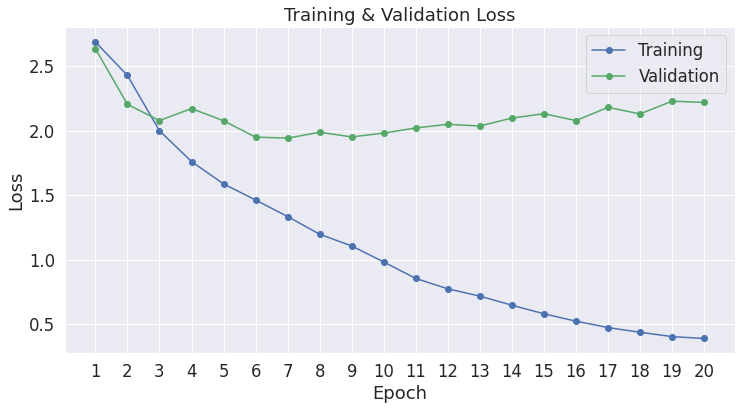

In [24]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15, 16, 17, 18, 19, 20])

plt.show()

# Train with Whole dataset

In [13]:
from transformers import BertTokenizer,  AutoTokenizer

# # Load the BERT tokenizer.
# print('Loading BERT tokenizer...')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Load the Roberta tokenizer.
print('Loading roberta tokenizer...')
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base', do_lower_case=True)

Loading roberta tokenizer...


In [14]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

In [15]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 8

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            dataset,  # The training samples.
            sampler = RandomSampler(dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )


In [16]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, RobertaForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
# model = BertForSequenceClassification.from_pretrained(
#     "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
#     num_labels = 2, # The number of output labels--2 for binary classification.
#                     # You can increase this for multi-class tasks.   
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
# )

model = RobertaForSequenceClassification.from_pretrained('xlm-roberta-base',
          num_labels = 20, # The number of output labels--2 for binary classification.  
          output_attentions = False, # Whether the model returns attentions weights.
          output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'c

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Layer

In [17]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())


In [18]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [19]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 20

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                      num_warmup_steps = 0, # Default value in run_glue.py
                      num_training_steps = total_steps)

In [20]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [21]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [22]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    
      

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            # 'Valid. Loss': avg_val_loss,
            # 'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time
            # 'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 20 ========
Training...
  Batch    40  of    180.    Elapsed: 0:00:19.
  Batch    80  of    180.    Elapsed: 0:00:37.
  Batch   120  of    180.    Elapsed: 0:00:56.
  Batch   160  of    180.    Elapsed: 0:01:15.

  Average training loss: 2.68
  Training epcoh took: 0:01:24

======== Epoch 2 / 20 ========
Training...
  Batch    40  of    180.    Elapsed: 0:00:19.
  Batch    80  of    180.    Elapsed: 0:00:38.
  Batch   120  of    180.    Elapsed: 0:00:56.
  Batch   160  of    180.    Elapsed: 0:01:15.

  Average training loss: 2.55
  Training epcoh took: 0:01:24

======== Epoch 3 / 20 ========
Training...
  Batch    40  of    180.    Elapsed: 0:00:19.
  Batch    80  of    180.    Elapsed: 0:00:37.
  Batch   120  of    180.    Elapsed: 0:00:56.
  Batch   160  of    180.    Elapsed: 0:01:15.

  Average training loss: 2.30
  Training epcoh took: 0:01:24

======== Epoch 4 / 20 ========
Training...
  Batch    40  of    180.    Elapsed: 0:00:19.
  Batch    80  of    180.  

Let's view the summary of the training process.

In [23]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Training Time
epoch,,
1,2.68,0:01:24
2,2.55,0:01:24
3,2.30,0:01:24
4,2.10,0:01:23
5,1.91,0:01:23
6,1.67,0:01:23
7,1.48,0:01:23
8,1.32,0:01:23
9,1.19,0:01:23


In [24]:
torch.save(model.state_dict(), "roberta_classifier_20epoch.pt")

# Test

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('xlm-roberta-base',
          num_labels = 20, # The number of output labels--2 for binary classification.  
          output_attentions = False, # Whether the model returns attentions weights.
          output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [ ]:
#model.load_state_dict(torch.load("roberta_classifier.pt"))

In [25]:
import pandas as pd


# Create sentence and label lists
sentences = processed_test_data.Text.values
ids = processed_test_data.Text.values


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Set the batch size.  
batch_size = 8 

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [26]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  
  # Store predictions and true labels
  predictions.append(logits)

print('    DONE.')

Predicting labels for 620 test sentences...
    DONE.


In [27]:
prebs = []
for i in range(len(predictions)):
  pred = np.argmax(predictions[i],1)
  prebs.extend(pred)


In [28]:
label_dict = dict(zip(processed_train_data.categorical_label, processed_train_data.Label))

In [29]:
label_dict

{0: 'ARTS AND CRAFTS',
 1: 'CULTURE',
 2: 'ECONOMY',
 3: 'EDUCATION',
 4: 'FARMING',
 5: 'FLOODING',
 6: 'HEALTH',
 7: 'LAW/ORDER',
 8: 'LOCALCHIEFS',
 9: 'MUSIC',
 10: 'OPINION/ESSAY',
 11: 'POLITICS',
 12: 'RELATIONSHIPS',
 13: 'RELIGION',
 14: 'SOCIAL',
 15: 'SOCIAL ISSUES',
 16: 'SPORTS',
 17: 'TRANSPORT',
 18: 'WILDLIFE/ENVIRONMENT',
 19: 'WITCHCRAFT'}

In [30]:
processed_test_data["categorical_label"] = prebs
processed_test_data["Label"] = [label_dict[x] for x in prebs]

In [31]:
processed_test_data[['ID','Label']]

,ID,Label
0,ID_ADHEtjTi,LAW/ORDER
1,ID_AHfJktdQ,RELIGION
2,ID_AUJIHpZr,RELATIONSHIPS
3,ID_AUKYBbIM,EDUCATION
4,ID_AZnsVPEi,SOCIAL ISSUES
...,...,...
615,ID_zdpOUWyJ,POLITICS
616,ID_zhnOomuu,SOCIAL ISSUES
617,ID_zmWHvBJb,LAW/ORDER
618,ID_zphjdFIb,SOCIAL ISSUES


In [33]:
processed_test_data[['ID','Label']].to_csv("submission.csv", index=False) 

Best score on website right now: 0.53548387
By Roberta 10 epoch. 512 length